long when closing price is > 70 RSA
short when closing price is < 30 RSA

In [1]:
import nsepy as nse
import matplotlib.pyplot as plt
from datetime import date
import pandas as pd
import numpy as np
import ta
from ta import *


template to bring data from nse

name of stock :hdfc


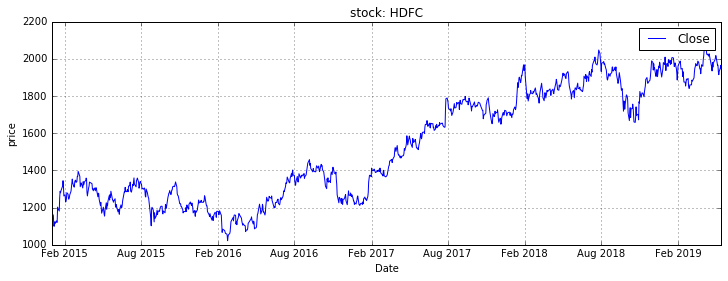

In [12]:

tick=str(raw_input('name of stock :')).upper()
STD=date(2015,1,1)
END=date(2019,5,15)
d=nse.get_history(str(tick),STD,END)
dt=pd.DataFrame(d)

p=dt.Close
p.head()

plt.figure(figsize=(12,4))
plt.xlabel('time')
plt.ylabel('price')

p.plot(color='blue')
plt.legend()
plt.title('stock: {}'.format(tick))
plt.grid()
plt.show()

In [13]:
rsi=ta.rsi(p)

In [14]:
buyprice=0.0
sellprice=0.0
cash =1
stock =0
#sma=200
mawealth =1.0

buy_data=[]
sell_data=[]
trade_price=[]
wealth=[]
used=dt.Close

#MA=used.rolling(window=sma,center=False).mean()
N=len(used)


In [19]:
for x in range(15,N):
    if rsi[x]< 30 and cash==1:
        buyprice=used[x]
    
        buy_data.append(buyprice)
        trade_price.append(buyprice)
        cash=0.0
        stock = 1
    elif rsi[x] < 70 and stock ==1:
        sellprice=used[x]
        
        sell_data.append(sellprice)
        trade_price.append(sellprice)
        stock = 0
        cash=1
        mawealth = mawealth*(sellprice/buyprice)
        wealth.append(mawealth)
w=pd.DataFrame(wealth)
wealth


[1.0070087906866239,
 1.0096022203547814,
 1.0449079120210927,
 0.9959160874123629,
 1.0696204810505288,
 1.0231656069202066,
 1.0570559034358118,
 1.1144241113304751,
 1.1953610008123736,
 1.2528884060570544,
 1.2514309428097377,
 1.2807623924184928,
 0.8357691220490758,
 0.809990849672001,
 0.8191919303612037,
 0.8136903485400282,
 0.8134618113478851,
 0.8234576716269654,
 0.8523234432682367,
 0.8517709361744118,
 0.8550431903397158,
 0.8472694935298141,
 0.8652272185316773,
 0.8720506730514905,
 0.8689101521896928,
 0.8913699190859187,
 0.8951793363113152,
 0.9000282661841211,
 0.8971801802698615,
 0.8825032434577815,
 0.8889216945470855,
 0.8846334892220574,
 0.8653256159719335,
 0.8568918372812896,
 0.8471756915683893,
 0.8471108633091632,
 0.8400997380462883,
 0.8393433062433183,
 0.8168286964143605,
 0.7988062598804064,
 0.7842879461402742,
 0.811250222096925,
 0.8303508799471109,
 0.8472365802419765,
 0.8313211576518105,
 0.8220918924080087,
 0.7994980078606361,
 0.799143520453

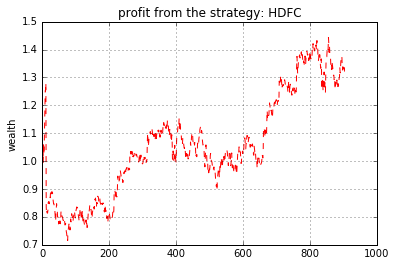

In [21]:
plt.plot(w,'r--')
plt.ylabel('wealth')
plt.title('profit from the strategy: {}'.format(tick))
plt.grid()